## Diabetes Prediction using Logistic Regression

In [1]:
#Imports necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, roc_auc_score


In [2]:
#Reads the dataset
diabetesData = pd.read_csv("diabetes.csv")

In [3]:
#Display the first 5 rows of the diabetesData dataframe.
diabetesData.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Provides information about the dataset
diabetesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
#Descriptive statistics that summarize the dataframe
diabetesData.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Display a concise summary of the dataframe
diabetesData.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
#Returns the sum of null values for each column in the diabetesData dataframe.
diabetesData.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#List of column names in the diabetesData dataframe.
diabetesData.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [9]:
#Dimensions of the dataframe
diabetesData.shape

(768, 9)

In [10]:
#Display Diabetes dataset
diabetesData

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## Data Pre-processing

In [11]:
#Impute missing values in "SkinThickness" column with its mean.

diabetesData["SkinThickness"]=diabetesData["SkinThickness"].replace(0, diabetesData["SkinThickness"].mean())

In [12]:
#Display Diabetes dataset
diabetesData

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,0,33.6,0.627,50,1
1,1,85,66,29.000000,0,26.6,0.351,31,0
2,8,183,64,20.536458,0,23.3,0.672,32,1
3,1,89,66,23.000000,94,28.1,0.167,21,0
4,0,137,40,35.000000,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180,32.9,0.171,63,0
764,2,122,70,27.000000,0,36.8,0.340,27,0
765,5,121,72,23.000000,112,26.2,0.245,30,0
766,1,126,60,20.536458,0,30.1,0.349,47,1


In [13]:
#Substituting mean values for Zero Insulin measurements
diabetesData["Insulin"]=diabetesData["Insulin"].replace(0, diabetesData["Insulin"].mean())

In [14]:
diabetesData

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35.000000,79.799479,33.6,0.627,50,1
1,1,85,66,29.000000,79.799479,26.6,0.351,31,0
2,8,183,64,20.536458,79.799479,23.3,0.672,32,1
3,1,89,66,23.000000,94.000000,28.1,0.167,21,0
4,0,137,40,35.000000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48.000000,180.000000,32.9,0.171,63,0
764,2,122,70,27.000000,79.799479,36.8,0.340,27,0
765,5,121,72,23.000000,112.000000,26.2,0.245,30,0
766,1,126,60,20.536458,79.799479,30.1,0.349,47,1


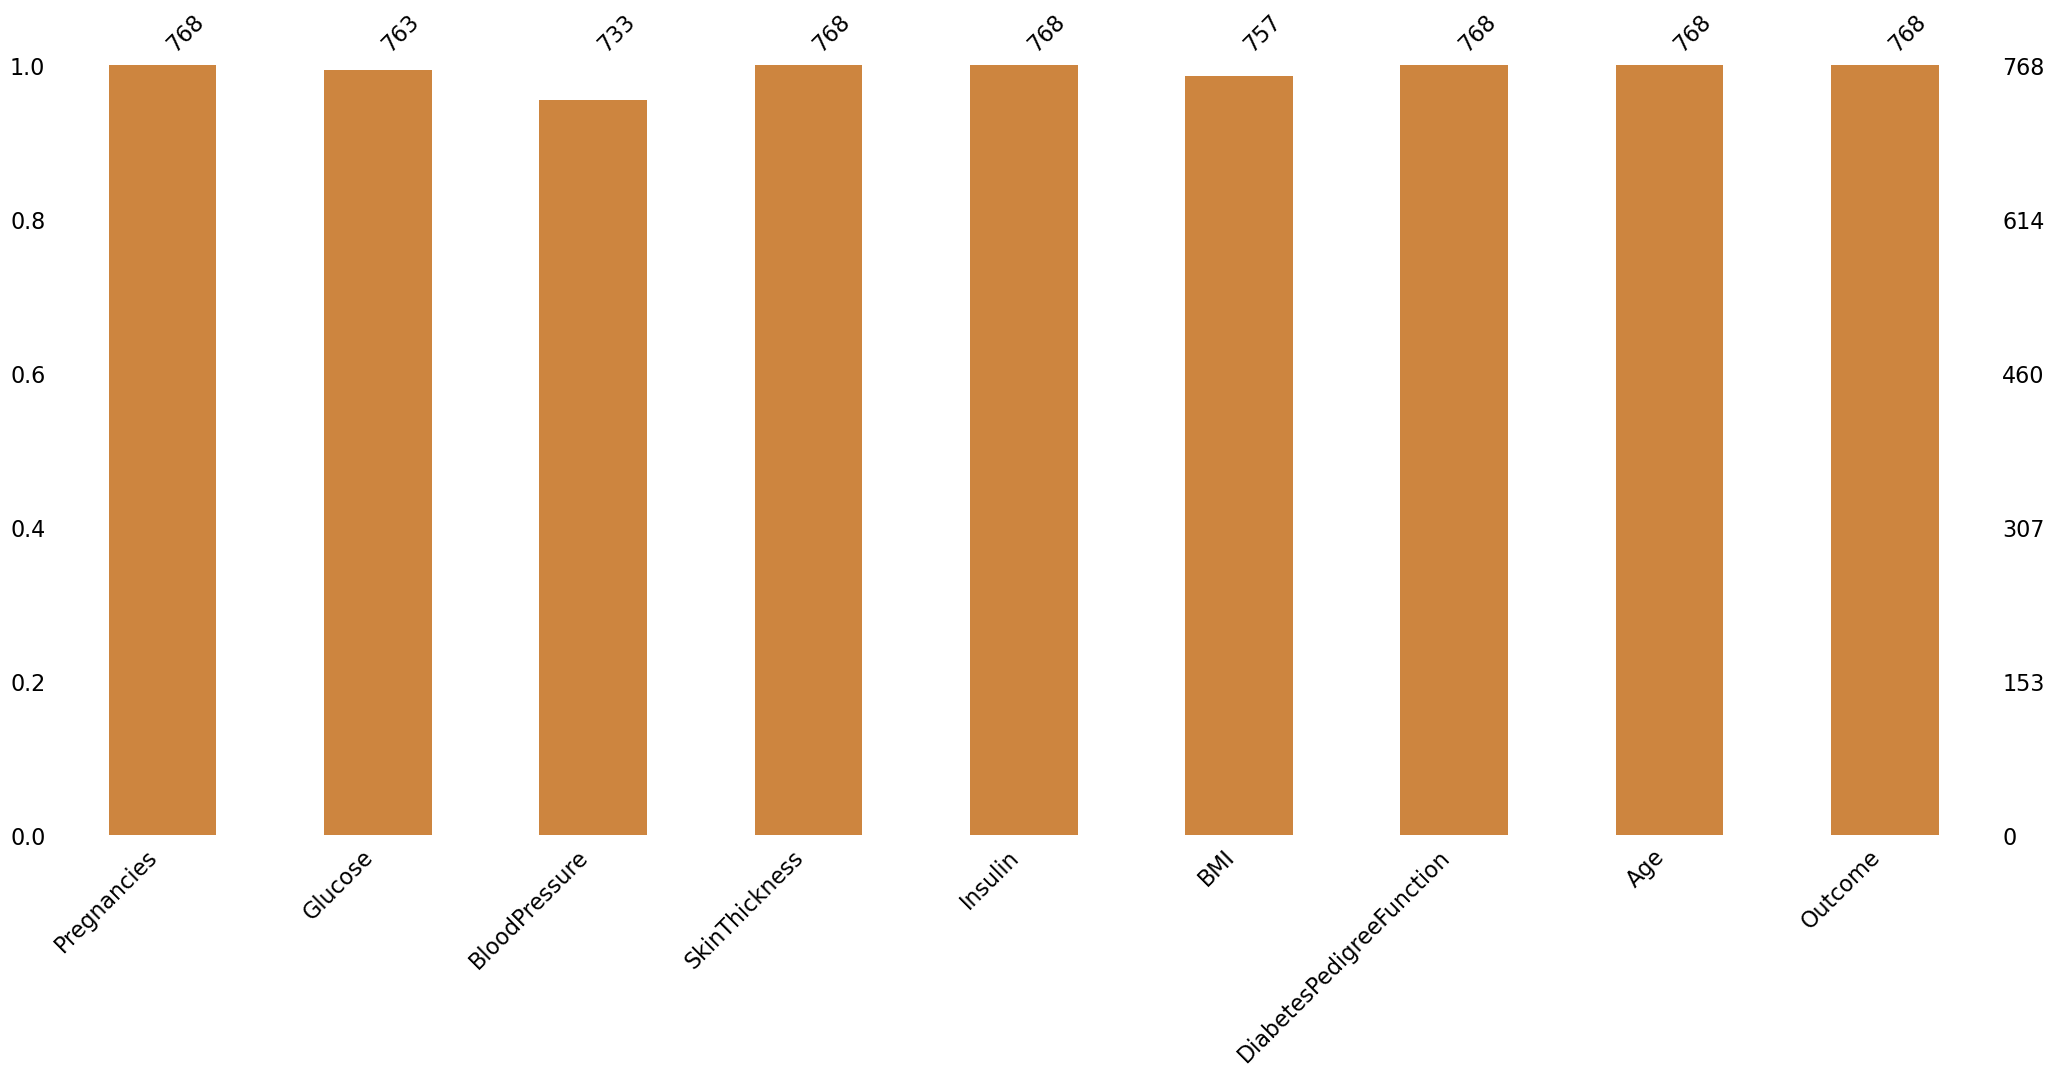

In [15]:
#Generates a missing value matrix plot for the diabetesData using the missingno library.
column = ["Glucose", "BloodPressure", "SkinThickness", "BMI"]
diabetesData[column] = diabetesData[column].replace(0, np.nan)
plot = msno.bar(diabetesData, color="peru")
plt.show()

In [16]:
#Replaces missing values in "Glucose", "BloodPressure", and "BMI" columns with their mean values.
columns = ["Glucose", "BloodPressure", "BMI"]
for col in columns:
    mean_val = diabetesData[col].mean()
    diabetesData[col].fillna(mean_val, inplace=True)

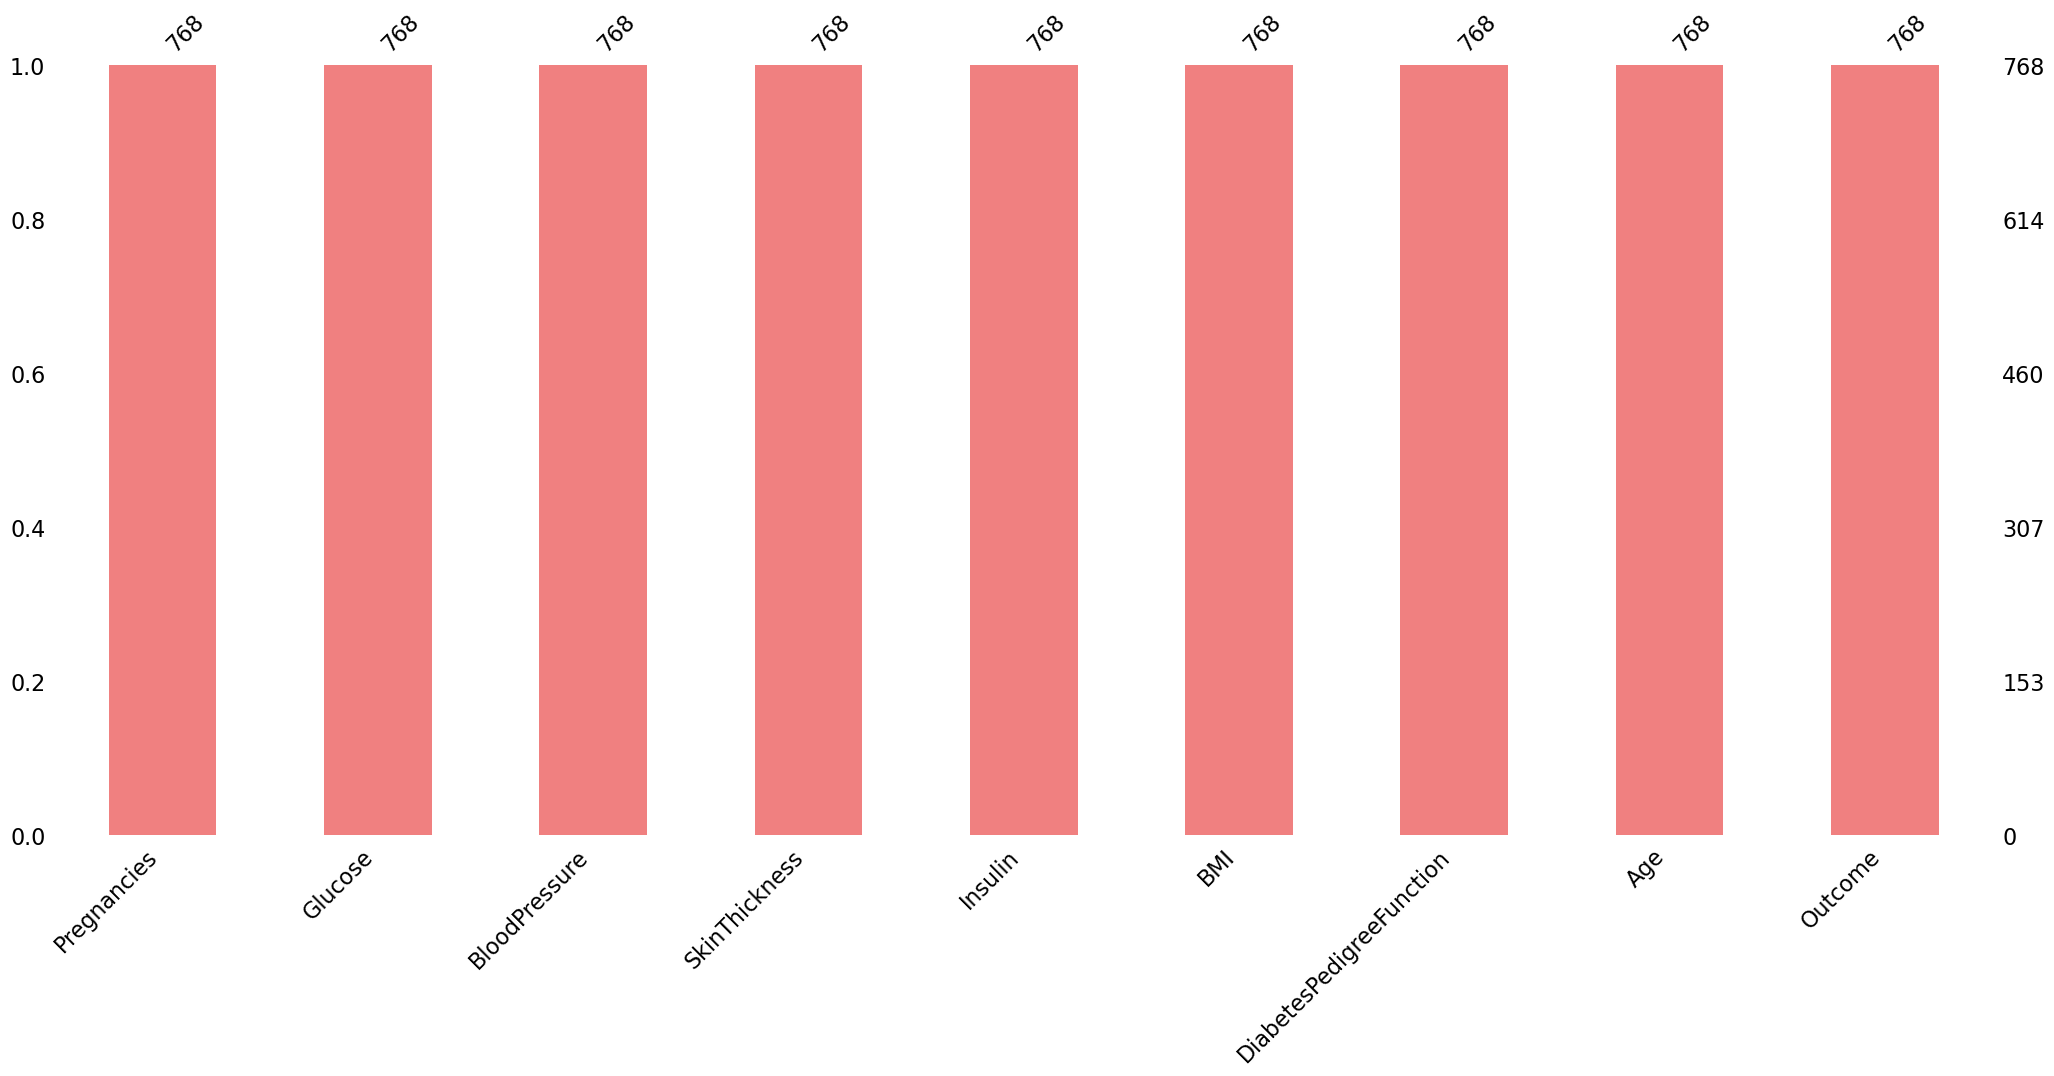

In [17]:
#Generates a missing value matrix plot for the diabetesData using the missingno library.
plot = msno.bar(diabetesData, color="lightcoral")
plt.show()

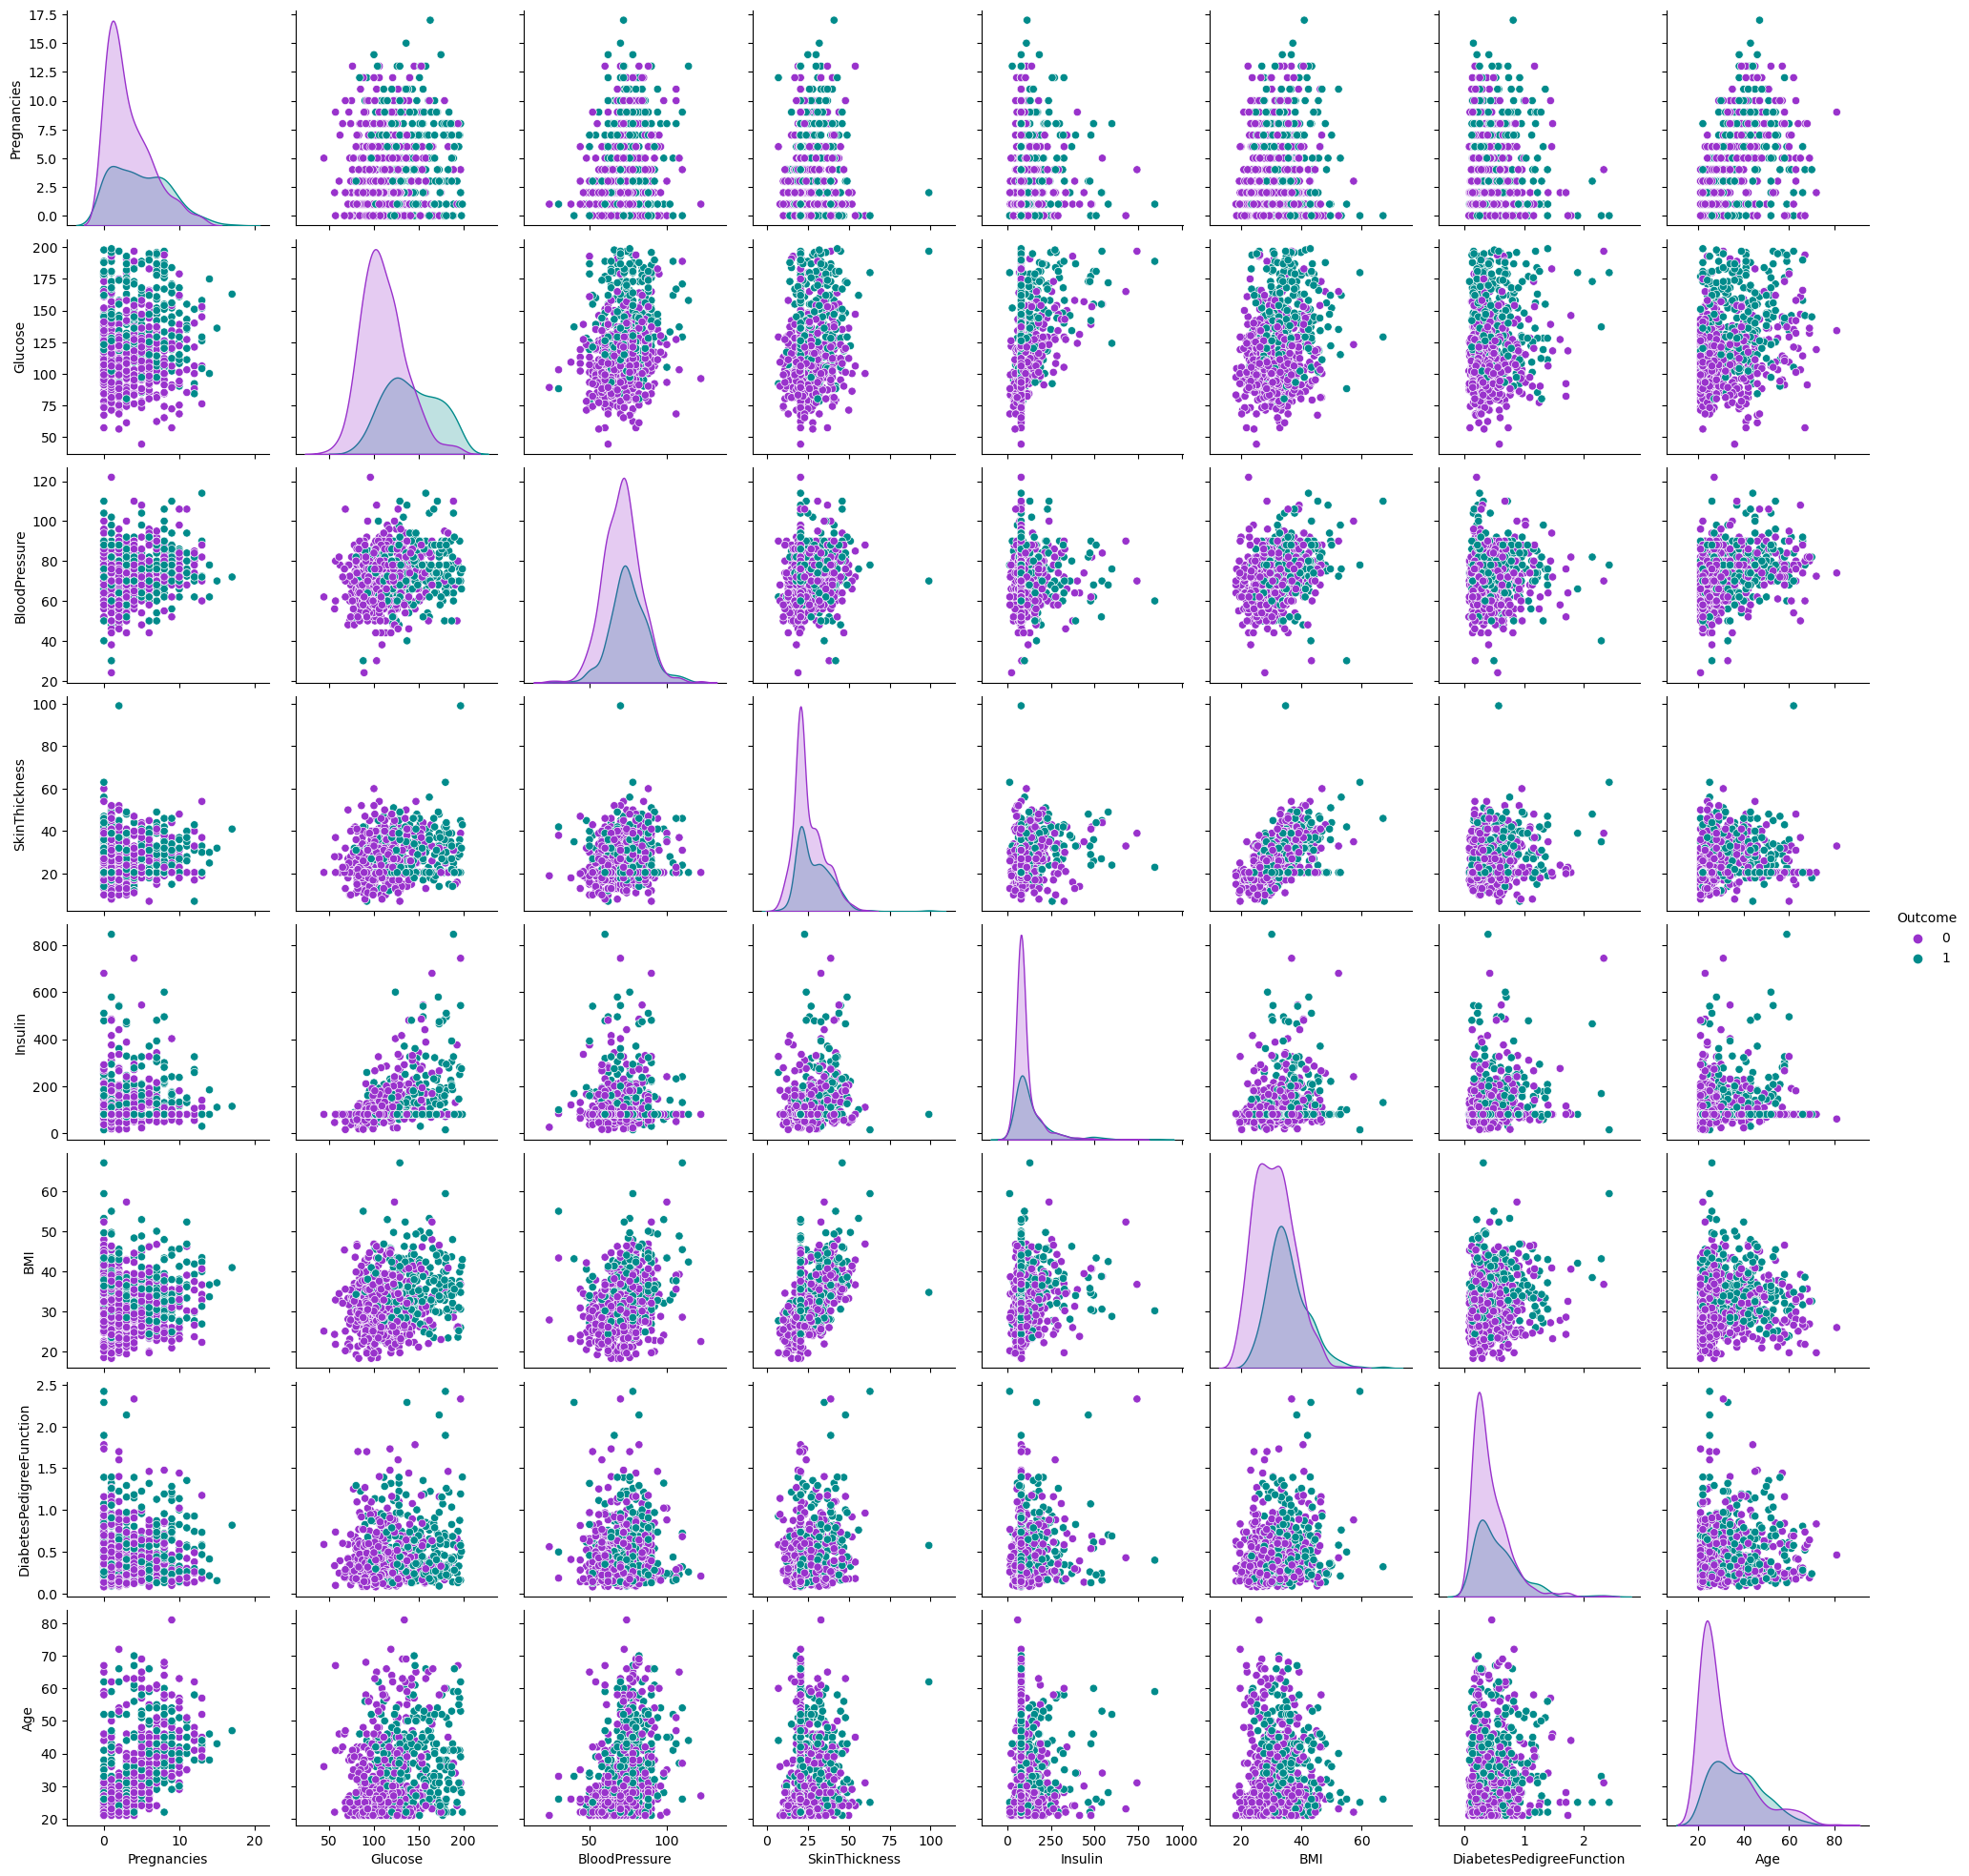

In [18]:
#creates a pair plot for the diabetes dataset with different colors for each outcome class.
colors = ["darkorchid", "darkcyan"]
plot = sns.pairplot(diabetesData, hue="Outcome", palette=colors)
plt.show()

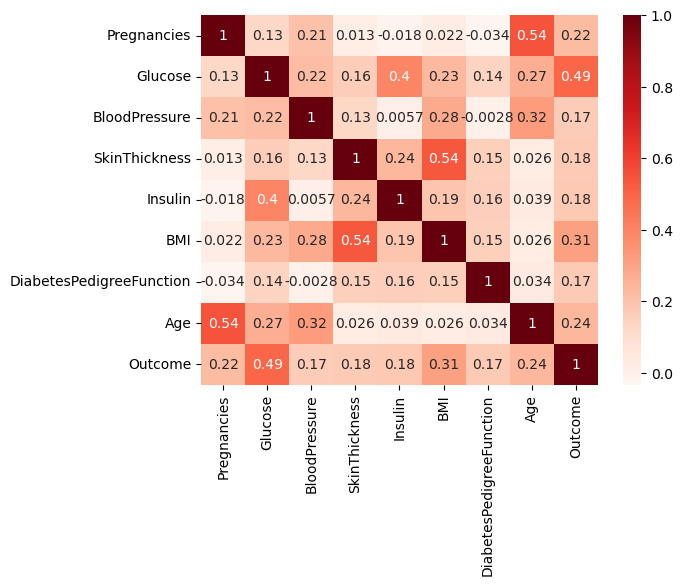

In [19]:
# Plot the heatmap
corr_matrix = diabetesData.corr()
sns.heatmap(corr_matrix, annot=True, cmap="Reds")
plt.show()

## Train Test Split

In [20]:
# Configure features-X and the target variable-y 
X = diabetesData.drop("Outcome", axis = 1)
y = diabetesData.Outcome

In [21]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Scale the input features using the StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Initialize a logistic regression model
lr = LogisticRegression()

In [24]:
# Fit the logistic regression model to the training data
lr.fit(X_train, y_train)

LogisticRegression()

In [25]:
#  Make predictions on the test set using the fitted logistic regression model
y_pred = lr.predict(X_test)

In [26]:
# Compute the accuracy of the logistic regression model on the test set
accuracy = accuracy_score(y_test, y_pred)

In [27]:
# Print the accurateness of the logistic regression model on the test set
print(f"The logistic regression model's accuracy is: {accuracy}")

The logistic regression model's accuracy is: 0.7662337662337663


In [28]:
# Print the classification report of the logistic regression model on the test set
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154



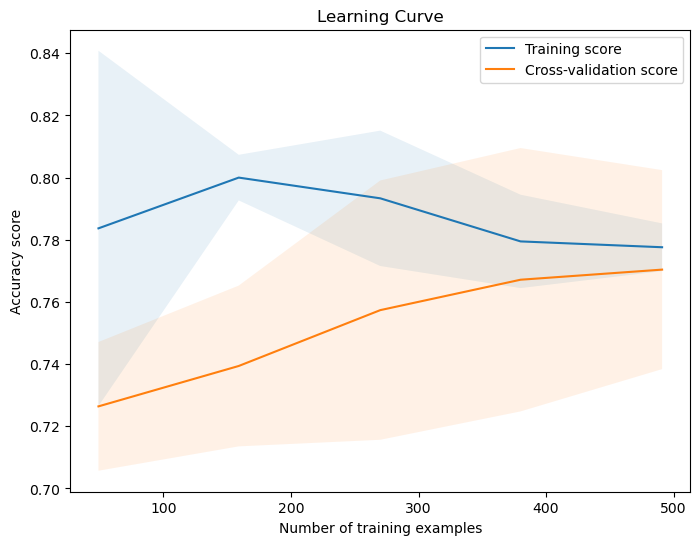

In [29]:


# Create function to generate learning curve
def plot_learning_curve(lr, X, y, cv):
    train_sizes, train_scores, test_scores = learning_curve(lr, X, y, cv=cv)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training score')
    plt.plot(train_sizes, test_mean, label='Cross-validation score')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)
    plt.xlabel('Number of training examples')
    plt.ylabel('Accuracy score')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.show()
    
# Call the function to generate the learning curve
plot_learning_curve(lr, X_train, y_train, cv=5)

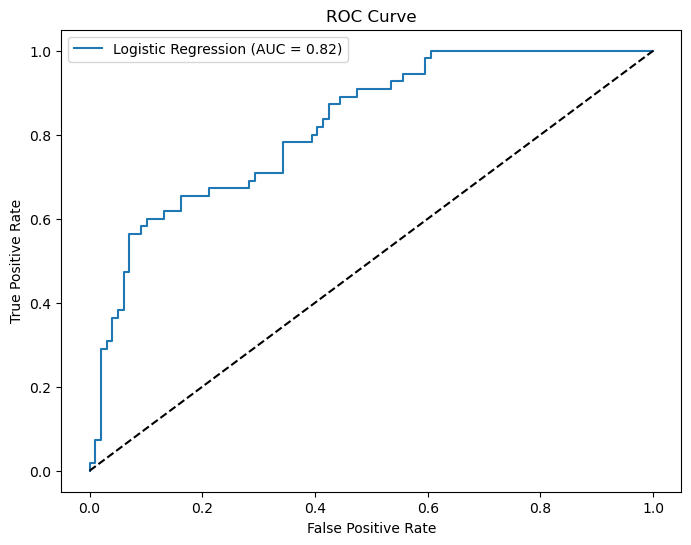

In [30]:
#Calculates AUC score and plots the ROC curve for a logistic regression model using test data.

# predict probabilities on test data
y_pred_proba = lr.predict_proba(X_test)[:,1]

# calculate false positive rate, true positive rate, and threshold values for ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# calculate AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)

# plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()